<a href="https://colab.research.google.com/github/pranshudiwan/NLP_CS_6200/blob/main/NLP_doc2vec%2Bwordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Import Libraries
import pandas as pd
import numpy as np


In [51]:
# Import train data
url_train = 'https://raw.githubusercontent.com/pranshudiwan/NLP_CS_6200/main/train.csv'
train = pd.read_csv(url_train)

# Import est data
url_test = 'https://raw.githubusercontent.com/pranshudiwan/NLP_CS_6200/main/test.csv'
test = pd.read_csv(url_test)

In [52]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [53]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Thus we have some null values in keyword and location columns. 

In [55]:
train.sample(10)

,id,keyword,location,text,target
3558,5085,famine,NaN,@FinancialTimes Ethiopian regimes continue rec...,1
2583,3705,destroyed,NaN,Hero you can 't swim lonely guy help me my sol...,0
4993,7124,military,NaN,@2for1Lapdances For the people who died in Hum...,1
2402,3459,derailed,"Washington, DC",Happy no one was hurt when #wmata train derail...,1
3464,4955,exploded,NaN,#dating #meet #sex Hot Teen Ass Exploded By Fa...,0
382,551,arson,USA,Thousands attend a rally organized by Peace No...,1
6576,9411,survivors,NaN,@MithiTennis @CrackedGem Which is why I want h...,0
5015,7154,mudslide,Wales,Hope Dorett's 'mudslide' cake wins?? #GBBO,0
6108,8721,sinking,Liverpool,Do you feel like you are sinking in low self-i...,1
841,1221,blizzard,NaN,I really wanna brownie batter blizzard ??,0


In [56]:
import re
train['text'] = train['text'].map(lambda x: re.sub(r'\W+', ' ', x))

In [57]:
train.sample(5)

,id,keyword,location,text,target
82,119,accident,NaN,Can wait to see how pissed Donnie is when I te...,0
1540,2225,chemical%20emergency,"Las Vegas, Nevada",Bomb Crash Loot Riot Emergency Pipe Bomb Nucle...,1
1362,1965,burning%20buildings,seattle grace mercy death,i never understood guys who wanted to run int...,0
1028,1493,body%20bags,NaN,you know you hate your body when you buy 2 bag...,0
264,381,annihilation,"Ljubljana, Slovenia",Stop the Annihilation of the Salt River Wild H...,1


In [58]:
train = train.apply(lambda x: x.astype(str).str.lower())

In [59]:
train.sample(5)

,id,keyword,location,text,target
7252,10382,weapons,california,navy no charges against officer for weapons vi...,1
5644,8049,refugees,nan,recap 12000 nigerian refugees repatriated from...,1
879,1273,blood,"biloxi, mississippi",sethalphaeus my personal favorites include pa...,0
1261,1817,buildings%20on%20fire,new hampshire,17 people displaced after 3 alarm fire tore th...,1
5617,8015,refugees,statute of limitations_,repulsive refugees victimiser dutton evangelic...,0


In [60]:
train['keyword'] = train['keyword'].map(lambda x: re.sub(r'\W+', ' ', x))
train['location'] = train['location'].map(lambda x: re.sub(r'\W+', ' ', x))
train.sample(5)

,id,keyword,location,text,target
6044,8639,seismic,nan,the art world s seismic shift back to the oddb...,0
4622,6570,injury,nan,sport_en just being linked to arsenal causes ...,1
2932,4213,drowned,pembroke nh,at the lake sees a dead fish me poor little gu...,0
6519,9322,survive,barbados,now realized i honestly can t survive without ...,0
6950,9972,tsunami,nan,crptotech tsunami and banks http t co khzteved...,1


In [61]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

train['text']=train['text'].apply(lambda x: remove_emoji(x))
train.sample(5)

,id,keyword,location,text,target
7025,10070,typhoon,phuket thailand,foxnews let me report it to u people instead ...,1
1015,1474,body 20bagging,401 livin,aubrey really out here body bagging meek,1
237,337,annihilated,university of toronto,sirbrandonknt exactly that s why the lesnar c...,0
5477,7816,quarantine,nan,reddit will now quarantine offensiveåêcontent ...,1
7062,10116,upheaval,chester,save the upset and stress of upheaval and let ...,0


In [62]:
!pip install pyspellchecker

In [63]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

#train['text']=train['text'].apply(lambda x : correct_spellings(x))
#train.sample(5)

In [64]:
text = 'corrrect me pleas. MY NLP preject is due tomrow'
correct_spellings(text)

'correct me please MY NLP project is due tomorow'

In [65]:
## Replacing common acronyms

def other_clean(text):
        """
            Other manual text cleaning techniques
        """
        # Typos, slang and other
        sample_typos_slang = {
                                "w/e": "whatever",
                                "usagov": "usa government",
                                "recentlu": "recently",
                                "ph0tos": "photos",
                                "amirite": "am i right",
                                "exp0sed": "exposed",
                                "<3": "love",
                                "luv": "love",
                                "amageddon": "armageddon",
                                "trfc": "traffic",
                                "16yr": "16 year"
                                }

        # Acronyms
        sample_acronyms =  { 
                            "mh370": "malaysia airlines flight 370",
                            "okwx": "oklahoma city weather",
                            "arwx": "arkansas weather",    
                            "gawx": "georgia weather",  
                            "scwx": "south carolina weather",  
                            "cawx": "california weather",
                            "tnwx": "tennessee weather",
                            "azwx": "arizona weather",  
                            "alwx": "alabama weather",
                            "usnwsgov": "united states national weather service",
                            "2mw": "tomorrow"
                            }

        
        # Some common abbreviations 
        sample_abbr = {
                        "$" : " dollar ",
                        "€" : " euro ",
                        "4ao" : "for adults only",
                        "a.m" : "before midday",
                        "a3" : "anytime anywhere anyplace",
                        "aamof" : "as a matter of fact",
                        "acct" : "account",
                        "adih" : "another day in hell",
                        "afaic" : "as far as i am concerned",
                        "afaict" : "as far as i can tell",
                        "afaik" : "as far as i know",
                        "afair" : "as far as i remember",
                        "afk" : "away from keyboard",
                        "app" : "application",
                        "approx" : "approximately",
                        "apps" : "applications",
                        "asap" : "as soon as possible",
                        "asl" : "age, sex, location",
                        "atk" : "at the keyboard",
                        "ave." : "avenue",
                        "aymm" : "are you my mother",
                        "ayor" : "at your own risk", 
                        "b&b" : "bed and breakfast",
                        "b+b" : "bed and breakfast",
                        "b.c" : "before christ",
                        "b2b" : "business to business",
                        "b2c" : "business to customer",
                        "b4" : "before",
                        "b4n" : "bye for now",
                        "b@u" : "back at you",
                        "bae" : "before anyone else",
                        "bak" : "back at keyboard",
                        "bbbg" : "bye bye be good",
                        "bbc" : "british broadcasting corporation",
                        "bbias" : "be back in a second",
                        "bbl" : "be back later",
                        "bbs" : "be back soon",
                        "be4" : "before",
                        "bfn" : "bye for now",
                        "blvd" : "boulevard",
                        "bout" : "about",
                        "brb" : "be right back",
                        "bros" : "brothers",
                        "brt" : "be right there",
                        "bsaaw" : "big smile and a wink",
                        "btw" : "by the way",
                        "bwl" : "bursting with laughter",
                        "c/o" : "care of",
                        "cet" : "central european time",
                        "cf" : "compare",
                        "cia" : "central intelligence agency",
                        "csl" : "can not stop laughing",
                        "cu" : "see you",
                        "cul8r" : "see you later",
                        "cv" : "curriculum vitae",
                        "cwot" : "complete waste of time",
                        "cya" : "see you",
                        "cyt" : "see you tomorrow",
                        "dae" : "does anyone else",
                        "dbmib" : "do not bother me i am busy",
                        "diy" : "do it yourself",
                        "dm" : "direct message",
                        "dwh" : "during work hours",
                        "e123" : "easy as one two three",
                        "eet" : "eastern european time",
                        "eg" : "example",
                        "embm" : "early morning business meeting",
                        "encl" : "enclosed",
                        "encl." : "enclosed",
                        "etc" : "and so on",
                        "faq" : "frequently asked questions",
                        "fawc" : "for anyone who cares",
                        "fb" : "facebook",
                        "fc" : "fingers crossed",
                        "fig" : "figure",
                        "fimh" : "forever in my heart", 
                        "ft." : "feet",
                        "ft" : "featuring",
                        "ftl" : "for the loss",
                        "ftw" : "for the win",
                        "fwiw" : "for what it is worth",
                        "fyi" : "for your information",
                        "g9" : "genius",
                        "gahoy" : "get a hold of yourself",
                        "gal" : "get a life",
                        "gcse" : "general certificate of secondary education",
                        "gfn" : "gone for now",
                        "gg" : "good game",
                        "gl" : "good luck",
                        "glhf" : "good luck have fun",
                        "gmt" : "greenwich mean time",
                        "gmta" : "great minds think alike",
                        "gn" : "good night",
                        "g.o.a.t" : "greatest of all time",
                        "goat" : "greatest of all time",
                        "goi" : "get over it",
                        "gps" : "global positioning system",
                        "gr8" : "great",
                        "gratz" : "congratulations",
                        "gyal" : "girl",
                        "h&c" : "hot and cold",
                        "hp" : "horsepower",
                        "hr" : "hour",
                        "hrh" : "his royal highness",
                        "ht" : "height",
                        "ibrb" : "i will be right back",
                        "ic" : "i see",
                        "icq" : "i seek you",
                        "icymi" : "in case you missed it",
                        "idc" : "i do not care",
                        "idgadf" : "i do not give a damn fuck",
                        "idgaf" : "i do not give a fuck",
                        "idk" : "i do not know",
                        "ie" : "that is",
                        "i.e" : "that is",
                        "ifyp" : "i feel your pain",
                        "IG" : "instagram",
                        "iirc" : "if i remember correctly",
                        "ilu" : "i love you",
                        "ily" : "i love you",
                        "imho" : "in my humble opinion",
                        "imo" : "in my opinion",
                        "imu" : "i miss you",
                        "iow" : "in other words",
                        "irl" : "in real life",
                        "j4f" : "just for fun",
                        "jic" : "just in case",
                        "jk" : "just kidding",
                        "jsyk" : "just so you know",
                        "l8r" : "later",
                        "lb" : "pound",
                        "lbs" : "pounds",
                        "ldr" : "long distance relationship",
                        "lmao" : "laugh my ass off",
                        "lmfao" : "laugh my fucking ass off",
                        "lol" : "laughing out loud",
                        "ltd" : "limited",
                        "ltns" : "long time no see",
                        "m8" : "mate",
                        "mf" : "motherfucker",
                        "mfs" : "motherfuckers",
                        "mfw" : "my face when",
                        "mofo" : "motherfucker",
                        "mph" : "miles per hour",
                        "mr" : "mister",
                        "mrw" : "my reaction when",
                        "ms" : "miss",
                        "mte" : "my thoughts exactly",
                        "nagi" : "not a good idea",
                        "nbc" : "national broadcasting company",
                        "nbd" : "not big deal",
                        "nfs" : "not for sale",
                        "ngl" : "not going to lie",
                        "nhs" : "national health service",
                        "nrn" : "no reply necessary",
                        "nsfl" : "not safe for life",
                        "nsfw" : "not safe for work",
                        "nth" : "nice to have",
                        "nvr" : "never",
                        "nyc" : "new york city",
                        "oc" : "original content",
                        "og" : "original",
                        "ohp" : "overhead projector",
                        "oic" : "oh i see",
                        "omdb" : "over my dead body",
                        "omg" : "oh my god",
                        "omw" : "on my way",
                        "p.a" : "per annum",
                        "p.m" : "after midday",
                        "pm" : "prime minister",
                        "poc" : "people of color",
                        "pov" : "point of view",
                        "pp" : "pages",
                        "ppl" : "people",
                        "prw" : "parents are watching",
                        "ps" : "postscript",
                        "pt" : "point",
                        "ptb" : "please text back",
                        "pto" : "please turn over",
                        "qpsa" : "what happens", #"que pasa",
                        "ratchet" : "rude",
                        "rbtl" : "read between the lines",
                        "rlrt" : "real life retweet", 
                        "rofl" : "rolling on the floor laughing",
                        "roflol" : "rolling on the floor laughing out loud",
                        "rotflmao" : "rolling on the floor laughing my ass off",
                        "rt" : "retweet",
                        "ruok" : "are you ok",
                        "sfw" : "safe for work",
                        "sk8" : "skate",
                        "smh" : "shake my head",
                        "sq" : "square",
                        "srsly" : "seriously", 
                        "ssdd" : "same stuff different day",
                        "tbh" : "to be honest",
                        "tbs" : "tablespooful",
                        "tbsp" : "tablespooful",
                        "tfw" : "that feeling when",
                        "thks" : "thank you",
                        "tho" : "though",
                        "thx" : "thank you",
                        "tia" : "thanks in advance",
                        "til" : "today i learned",
                        "tl;dr" : "too long i did not read",
                        "tldr" : "too long i did not read",
                        "tmb" : "tweet me back",
                        "tntl" : "trying not to laugh",
                        "ttyl" : "talk to you later",
                        "u" : "you",
                        "u2" : "you too",
                        "u4e" : "yours for ever",
                        "utc" : "coordinated universal time",
                        "w/" : "with",
                        "w/o" : "without",
                        "w8" : "wait",
                        "wassup" : "what is up",
                        "wb" : "welcome back",
                        "wtf" : "what the fuck",
                        "wtg" : "way to go",
                        "wtpa" : "where the party at",
                        "wuf" : "where are you from",
                        "wuzup" : "what is up",
                        "wywh" : "wish you were here",
                        "yd" : "yard",
                        "ygtr" : "you got that right",
                        "ynk" : "you never know",
                        "zzz" : "sleeping bored and tired"
                        }
            
        sample_typos_slang_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_typos_slang.keys()) + r')(?!\w)')
        sample_acronyms_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_acronyms.keys()) + r')(?!\w)')
        sample_abbr_pattern = re.compile(r'(?<!\w)(' + '|'.join(re.escape(key) for key in sample_abbr.keys()) + r')(?!\w)')
        
        text = sample_typos_slang_pattern.sub(lambda x: sample_typos_slang[x.group()], text)
        text = sample_acronyms_pattern.sub(lambda x: sample_acronyms[x.group()], text)
        text = sample_abbr_pattern.sub(lambda x: sample_abbr[x.group()], text)
        
        return text

In [66]:
## !Need to change variable names and abbrevations as appropriate
train["text"] = train["text"].apply(lambda x: other_clean(x))
train.sample(5)

,id,keyword,location,text,target
2609,3744,destroyed,cuttack orissa,harbhajan_singh stuartbroad8 i cant believe i...,0
591,853,bioterror,nan,world fedex no longer to transport bioterror ...,0
2398,3450,derail,dayton oh,realdonaldtrump rushlimbaugh its proof democr...,0
4308,6116,hellfire,,hellfire is surrounded by desires so be carefu...,0
5778,8245,rioting,spare oom,if they kill off val i m rioting emmerdale,0


In [67]:
## Removing single characters
train["text"] = train["text"].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
def tokenizer(text):
    tokenized = []
    for string in text:
        string = re.sub('[^a-z\sA-Z]', '', string)
        # get rid of all the http syntax
        string = re.sub('http\S+', '', string)
        tokenized.append([w for w in string.split() if w not in stop])
    return tokenized

In [70]:
train['tokenized'] = tokenizer(train["text"])

In [71]:
train.sample(5)

,id,keyword,location,text,target,tokenized
5008,7142,military,nan,study wider variety of therapies could help ve...,0,"[study, wider, variety, therapies, could, help..."
4634,6586,inundated,england wales border uk,lenn_len probably we are inundated with them ...,0,"[lennlen, probably, inundated, years]"
7374,10557,windstorm,florida usa,one thing wanna see before die gt trump standi...,0,"[one, thing, wanna, see, die, gt, trump, stand..."
970,1405,body 20bag,nan,new summer long thin body bag hip word skirt b...,0,"[new, summer, long, thin, body, bag, hip, word..."
6882,9866,traumatised,cork,annmarieronan niamhosullivanx can watch tat s...,0,"[annmarieronan, niamhosullivanx, watch, tat, s..."


In [72]:
# Performing stemming

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [73]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
def stem(unstemmed_list):  
  ps = PorterStemmer()

  final_stemmed_list = []

  for i in range(len(unstemmed_list)):
    sentence = unstemmed_list[i]
    #print(sentence)
    words = word_tokenize(sentence)
    stemmed_list = []
    for w in words:
        stemmed_list.append(ps.stem(w))
    stemmed_list = ' '.join(stemmed_list)
    final_stemmed_list.append(stemmed_list)

  return final_stemmed_list


In [75]:
unstemmed_list = train['text'].tolist()
train['stemmed_text'] = stem(unstemmed_list)


In [76]:
#Removing digits
train['stemmed_text'] = train['stemmed_text'].str.replace('\d+', '')

In [77]:
train.sample(5)

,id,keyword,location,text,target,tokenized,stemmed_text
3531,5047,eyewitness,nan,monkeys abused by notorious laboratory dealer ...,0,"[monkeys, abused, notorious, laboratory, deale...",monkey abus by notori laboratori dealer peta e...
3823,5439,first 20responders,aberdeenshire,us wants future first responders to be more hi...,0,"[us, wants, future, first, responders, high, t...",us want futur first respond to be more high te...
4566,6492,injuries,emirates,last time checked lots of injuries over the co...,0,"[last, time, checked, lots, injuries, course, ...",last time check lot of injuri over the cours o...
4916,7001,mayhem,orlando fl,guess ill never be able to go to mayhem,0,"[guess, ill, never, able, go, mayhem]",guess ill never be abl to go to mayhem
5371,7663,panic,nan,we was all just laughing and talking junk now ...,0,"[laughing, talking, junk, everyone, panic, mode]",we wa all just laugh and talk junk now everyon...


In [78]:
# Data visualization imports
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# importing images
from google.colab import files
from IPython.display import Image


In [79]:
twitter_image = files.upload()

Saving twitter_mask.png to twitter_mask (1).png


In [80]:
# word cloud of keywords for both classes (starts)
disaster_tweets = train.groupby("target")

disaster_tweets.describe().head()

id         ...                                       stemmed_text     
       count unique  ...                                                top freq
target               ...                                                        
0       4342   4342  ...  black eye space battl occur at star o involv f...    7
1       3271   3271  ...   year old boy charg with manslaught of toddler...   10

[2 rows x 24 columns]

In [81]:
# divide disaster tweets by text
# disaster_tweets = train[train['target'] == '1'].text
# disaster_tweets = " ".join(line for line in disaster_tweets)

# non_disaster_tweets = train[train['target'] == '0'].text
# non_disaster_tweets = " ".join(line for line in non_disaster_tweets)

disaster_list = train[train['target'] == '1'].tokenized
disaster_tweets = ""
for line in disaster_list:
  disaster_tweets += " ".join(token for token in line)


non_disaster_list = train[train['target'] == '0'].tokenized
non_disaster_tweets = ""
for line in non_disaster_list:
  non_disaster_tweets += " ".join(token for token in line)



In [82]:
# Setting mask for wordcloud.
from PIL import Image
twitter_mask = np.array(Image.open('twitter_mask.png'))

In [83]:
# Function: plot_wordcloud
# Params: title (str) - title for the wordcloud,
#         text (str) - joined text to display
#         background_color (str) - "white", "black"
# Does: plots the wordcloud
def plot_wordcloud(title, text, background_color):
  stopwords = set(STOPWORDS)
  # update stowords (if needed)
  stopwords.update(["https", "co", "__", "amp", "û", "will", "new", "I"])


  wordcloud = WordCloud(mask=twitter_mask, stopwords=stopwords, background_color=background_color,
                        width=1800, height=1400).generate(text)
  plt.figure(figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)

  plt.title(title,
              fontdict={
                  'size': 20,
                  'verticalalignment': 'bottom'
              })
  plt.show()

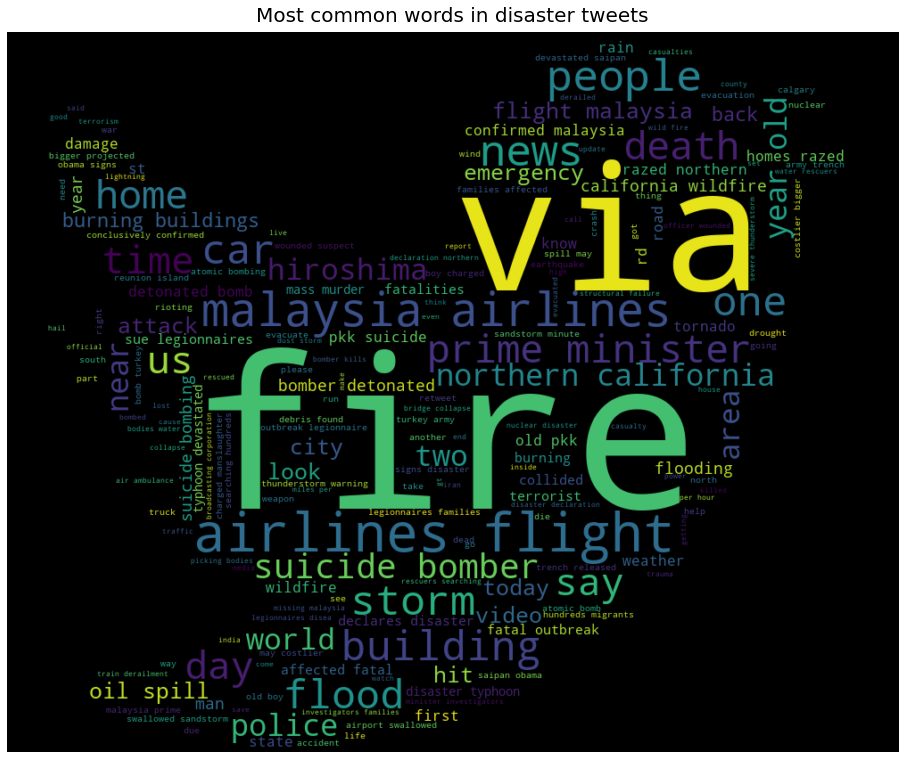

In [84]:
plot_wordcloud("Most common words in disaster tweets", disaster_tweets, "black")

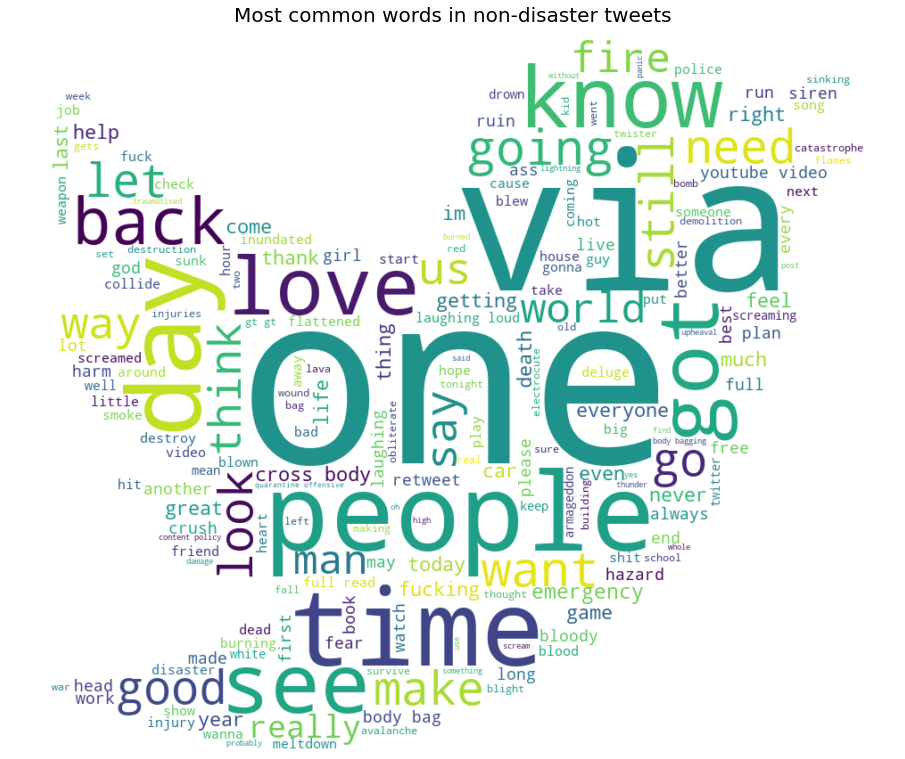

In [85]:
plot_wordcloud("Most common words in non-disaster tweets", non_disaster_tweets, "white")

disaster tweets have much more specific terms like "malaysian airlines", "norther california". 

non-disaster tweet terms are more general like "people", "day", "game"..


Some common words involved links (which is added in stopwords becauset they are irrelevant).
Still looking for ways to get rid of "__" and "u hat".


Doc2Vec build vector embeddings for each document in data. 
(developed by same creators of word2vec)


In [86]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tqdm import tqdm 

In [87]:

# Function: classify_doc2vec
# Params: train and test dataframe (each with "stemmed_text" and "target" column)
#         n - (odd integer) number of most similar vectors for classification
# Returns: classification of test dataset (list)
# Does: classify all the test tweets based on doc2vec modeling
#       finds n most similar documents from train dataset and classify based on majority
def classify_doc2vec(train, test, n):
  # prepare all the tokens and classifications fror modeling 
  test_x = list(tokenizer(test["stemmed_text"]))
  train_x = list(tokenizer(train["stemmed_text"]))
  train_y = list(train["target"])

  # tag the document and model (use devset to tune the params)
  # model - using distributed bag of words version
  # larger vectors give more accurate results (vector size = 1000, give 70% accuracy)
  tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_x)]
  model = Doc2Vec(tagged_docs, vector_size=1000, dm = 0, window=7, min_count=1, epochs = 100)
  
  # get the most similar vectors for each text in testset and classify them by majority
  # ex. if 3/5 similar vectors were classified as disaster tweet, that tweet is a disaster tweets
  
  pred_y = []
  for text in tqdm(test_x):
    v = model.infer_vector(text, steps = 100)
    similar_vectors = model.docvecs.most_similar([v], topn = n)

    class_dic = {'1': 0, '0': 0} 
    for i, j in similar_vectors:
      pred = train_y[i]
      class_dic[pred] += 1 
    
    if (class_dic['1'] > class_dic['0']):
      pred_y.append('1')
    else:
      pred_y.append('0')

  return pred_y

# Function: evaluate pred
# params: expected (correct classification), real (prediction)
#         both should be 'list' type and 
#         elements should be string (so '1' not integer 1)
# Returns: dictionary of accuracy, precision, recall, and f1
# followed formulas here: https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/
def evaluate_pred(expected, pred):
  # true positive (TP): expected = '1', pred = '1'
  # false negative (FN): expected = '1', pred = '0'
  # false positive (FP): expected = '0', pred = '1'
  # true negative (TN): expected = '0', pred = '0'
  TP = 0
  FN = 0
  FP = 0
  TN = 0

  if len(pred) != len(expected):
    print("The number of predictions are not equal to number of expected")
    assert 1 == 2

  for i in range(len(pred)):
    e = expected[i]
    p = pred[i]
    if e == '1':
      if p == '1':
        TP += 1
      else:
        FN += 1
    else:
      if p == '1':
        FP += 1
      else:
        TN += 1

  # accuracy = correct predictions over total (disaster tweets + non-disaster tweets)
  # Precision = correct disaster predictions / total predicted disaster tweets
  # Recall = correct disaster predictions / total actual disaster tweets 
  # F1 = harmonic mean of precision and recall 
  accuracy = (TP + TN) / len(pred)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  F1 = 2 * (recall * precision) / (recall + precision)

  return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'F1': F1}




In [88]:
# test on dev set 
dev_set = train.iloc[:1500]
train_set = train.iloc[1500:]

# changing numbers of topn didn't change accuracy that much
# greater vector size and epoch affected accuracy way more
# generally better with recall than precision 
pred = classify_doc2vec(train_set, dev_set, 5)
evaluate_pred(list(dev_set['target']), pred)

100%|██████████| 1500/1500 [00:14<00:00, 100.33it/s]


{'F1': 0.6292134831460675,
 'accuracy': 0.714,
 'precision': 0.6086956521739131,
 'recall': 0.6511627906976745}

Try SVC modeling (support vector classifier). Fit data we provide, returning best fit"

In [90]:
train['tokenized_stem'] = tokenizer(train["stemmed_text"])

val_set = train.iloc[:1500]
train_set = train.iloc[1500:]

val_x = list(val_set["tokenized_stem"])
val_y = list(val_set["target"])

train_x = list(train_set["tokenized_stem"])
train_y = list(train_set["target"])

In [91]:

tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_x)]
model = Doc2Vec(tagged_docs, vector_size=200, dm = 0, window=7, min_count=1, epochs = 40)

train_vec = []
val_vec = []
for text in train_x:
  train_vec.append(model.infer_vector(text, steps = 20))

for text in val_x:
  val_vec.append(model.infer_vector(text, steps = 20))



In [92]:
from sklearn.svm import SVC

svc = SVC(random_state=1, C = 5, gamma = 6, kernel = 'linear', probability = True)
svc.fit(train_vec, train_y)

svc_pred = svc.predict(val_vec)

# better with precision, less accurate with recall (vector-200)
evaluate_pred(true_y, svc_pred)

F1 =  0.5668571428571428
Accuracy =  0.7848101265822784


better with precision, less accurate with recall (vector - 1000)

more accurate precision, but hurts recall 

works better with smaller vectors 


{'F1': 0.059027777777777776,

 'accuracy': 0.6386666666666667,

 'precision': 1.0,
 
 'recall': 0.03041144901610018}

In [94]:
# better with precision, less accurate with recall (vector - 1000)
# more accurate precision, but hurts recall 
# works better with smaller vectors 
evaluate_pred(true_y, svc_pred)

{'F1': 0.5668571428571428,
 'accuracy': 0.7473333333333333,
 'precision': 0.7848101265822784,
 'recall': 0.44364937388193204}

In [95]:
# try logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)

lr.fit(train_vec, train_y)
lr_pred = lr.predict(val_vec)
evaluate_pred(true_y, lr_pred)

{'F1': 0.6277939747327502,
 'accuracy': 0.7446666666666667,
 'precision': 0.6872340425531915,
 'recall': 0.5778175313059034}

In [96]:
# word to vec
import gensim

wv_model = gensim.models.word2vec.Word2Vec(train_x, size=300, window=7, min_count=1, sg=1, iter=40)
len(wv_model.wv.vocab)

14991

In [97]:
# use average value of vectors to represent each tweet (document)
def get_average(model, tokens_list):
  vocabs = set(model.wv.vocab.keys())

  vec = []
  for word in tokens_list: 
    if word in vocabs:
      vec.append(model[word])
    else:
      vec.append(np.zeros(300))

  sum = np.sum(vec, axis = 0)
  return np.divide(sum, len(vec))


def get_embeddings(model, data):
  embeddings = []
  for token_list in data:
    embeddings.append(get_average(model, token_list))
  return embeddings

In [98]:
train_embeddings = get_embeddings(wv_model, train_x)
val_embeddings = get_embeddings(wv_model, val_x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [99]:
# use logistic regression on word2vec
lr.fit(train_embeddings, train_y)
word_lr_pred = lr.predict(val_embeddings)
evaluate_pred(true_y, word_lr_pred)

{'F1': 0.6042105263157895,
 'accuracy': 0.7493333333333333,
 'precision': 0.7340153452685422,
 'recall': 0.5134168157423972}

In [100]:
svc = SVC(random_state=1, C = 5, gamma = 6, kernel = 'linear', probability = True)
svc.fit(train_embeddings, train_y)

svc_pred = svc.predict(val_embeddings)
evaluate_pred(true_y, svc_pred)


{'F1': 0.5900552486187846,
 'accuracy': 0.7526666666666667,
 'precision': 0.7716763005780347,
 'recall': 0.4776386404293381}

Viz Ideas:
1. Class Distribution - Sindhu
2. Word cloud of keywords for both classes - Hearan
3. Bi-gram bar plot (bar plot of most frequently occuring words for both classes) - Pranshu
4. Average length of tweet for both classes - Sindhu
5. 

Data processing proposed steps: (Done)
1. Removal of punctuations, unwanted text
2. Performing stemming/lemmatization
3. Spell check
4. Removing emojis
5. Replacing common acronyms/shorhands
6.


EDA Ideas:
1. Clustering Tweets from same location over a short time period - (if many tweets come from the same location in a short time containing keywords for disasters they might actually be a disaster)
2. Clustering tweets via keyword - if the same keyword is being used over a short period of time it might mean a disaster
3. 

Models:
1. Word2Vec with GloVe
2. Simple LSTMs
3. LSTMs with Hidden layers
4. (Possibly) BERT



(Rough sketch)

Project doc: (numbers denote page numbers)

1. Names, Project title)
2. Introduction:
What is the problem we're trying to solve, How are we using NLP to solve the problem, Proposed method (in brief) on how we'll solve, Impact of problem on society (use-case irl)
3. Dataset used, data cleaning methods (and why it was necessary)
4. EDA: 
5. Visualizations
6. Models used (1 page each per model):
Explaining the model architecture in brief, why was it best to use this model (or appropriate), what was the model parameters (explain a few if needed), what were the results, and what metrics were used to obtain the resutls
9. Conclusions, model comparisons, final words
10. Team member contributions







